In [5]:
import numpy as np
import pandas as pd
from numpy import math 

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt

In [9]:
df=pd.read_csv(r'50_startups.csv')

In [10]:
df.head(10)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [15]:
len(df)

50

In [16]:
df.shape

(50, 5)

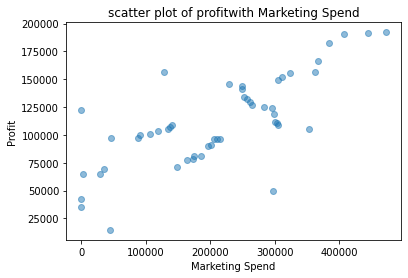

In [22]:
plt.scatter(df['Marketing Spend'], df['Profit'], alpha=0.5)
plt.title('scatter plot of profit with Marketing Spend')
plt.xlabel('Marketing Spend')
plt.ylabel('Profit')
plt.show()

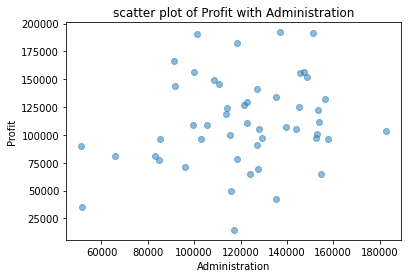

In [26]:
plt.scatter(df['Administration'], df['Profit'], alpha=0.5)
plt.title('scatter plot of Profit with Administration')
plt.xlabel('Administration')
plt.ylabel('Profit')
plt.show()

Text(0, 0.5, 'Profit')

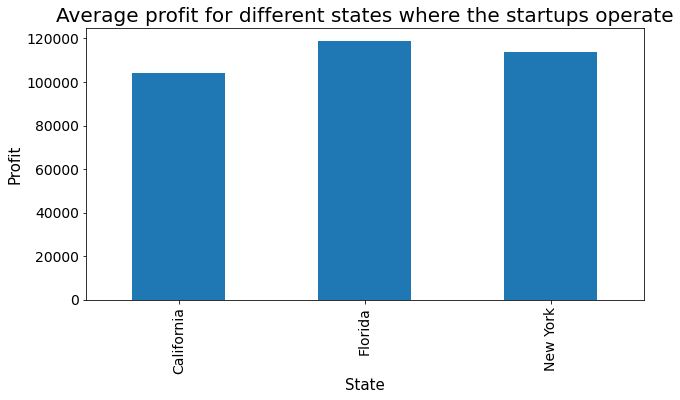

In [34]:
ax=df.groupby(['State'])['Profit'].mean().plot.bar(
   figsize = (10,5),
   fontsize = 14
)
ax.set_title("Average profit for different states where the startups operate", fontsize =20)


ax.set_xlabel("State",fontsize = 15)
ax.set_ylabel("Profit",fontsize = 15)

In [36]:
df.State.value_counts()

California    17
New York      17
Florida       16
Name: State, dtype: int64

In [46]:
df['newyork_state'] = np.where(df['State']=='New York',1,0)
df['California_state'] = np.where(df['State']=='California',1,0)
df['Florida_state'] = np.where(df['State']=='Florida',1,0)

df.drop(columns=['State'],axis=1,inplace=True)

In [47]:
df.head()

,R&D Spend,Administration,Marketing Spend,Profit,newyork_state,California_state,Florida_state
0,165349.20,136897.80,471784.10,192261.83,1,0,0
1,162597.70,151377.59,443898.53,191792.06,0,1,0
2,153441.51,101145.55,407934.54,191050.39,0,0,1
3,144372.41,118671.85,383199.62,182901.99,1,0,0
4,142107.34,91391.77,366168.42,166187.94,0,0,1


In [70]:
dependent_variable='Profit'

In [71]:
independent_variables =df.columns.tolist()

In [72]:
independent_variables.remove(dependent_variable)

In [74]:
x=df[independent_variables].values
y=df[dependent_variable].values

In [77]:
x_train,x_test, y_train, y_test = train_test_split(x, y , test_size=0.2, random_state = 0)

In [82]:
scaler = MinMaxScaler()
x_train=scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [83]:
x_train[0:10]

array([[0.33561668, 0.48655174, 0.45494286, 0.        , 0.        ,
        1.        ],
       [0.2782839 , 0.3173015 , 0.43561799, 1.        , 0.        ,
        0.        ],
       [0.45557444, 0.87258866, 0.28413435, 0.        , 0.        ,
        1.        ],
       [0.2807759 , 1.        , 0.44680961, 0.        , 1.        ,
        0.        ],
       [0.55488118, 0.59103645, 0.62511553, 0.        , 0.        ,
        1.        ],
       [0.7880179 , 0.88568959, 0.68649342, 0.        , 0.        ,
        1.        ],
       [0.72539353, 0.98922572, 0.54370828, 0.        , 0.        ,
        1.        ],
       [0.0060492 , 0.6847981 , 0.0040356 , 1.        , 0.        ,
        0.        ],
       [0.00327821, 0.00432296, 0.        , 1.        , 0.        ,
        0.        ],
       [0.39676926, 0.95618996, 0.22709197, 1.        , 0.        ,
        0.        ]])

In [84]:
regressor= LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [85]:

y_pred = regressor.predict(x_test)

In [86]:
math.sqrt(mean_squared_error(y_test, y_pred))

9765.826092181349

In [87]:
r2_score(y_test, y_pred)

0.925426549220814